In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo = pd.read_csv('Zoo.csv')

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo['animal name'].value_counts()

frog        2
lynx        1
honeybee    1
gnat        1
flamingo    1
           ..
lion        1
hawk        1
leopard     1
crayfish    1
skimmer     1
Name: animal name, Length: 100, dtype: int64

In [7]:
#check if there are duplicates in animal_name
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [8]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

In [10]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [11]:
zoo.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [12]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

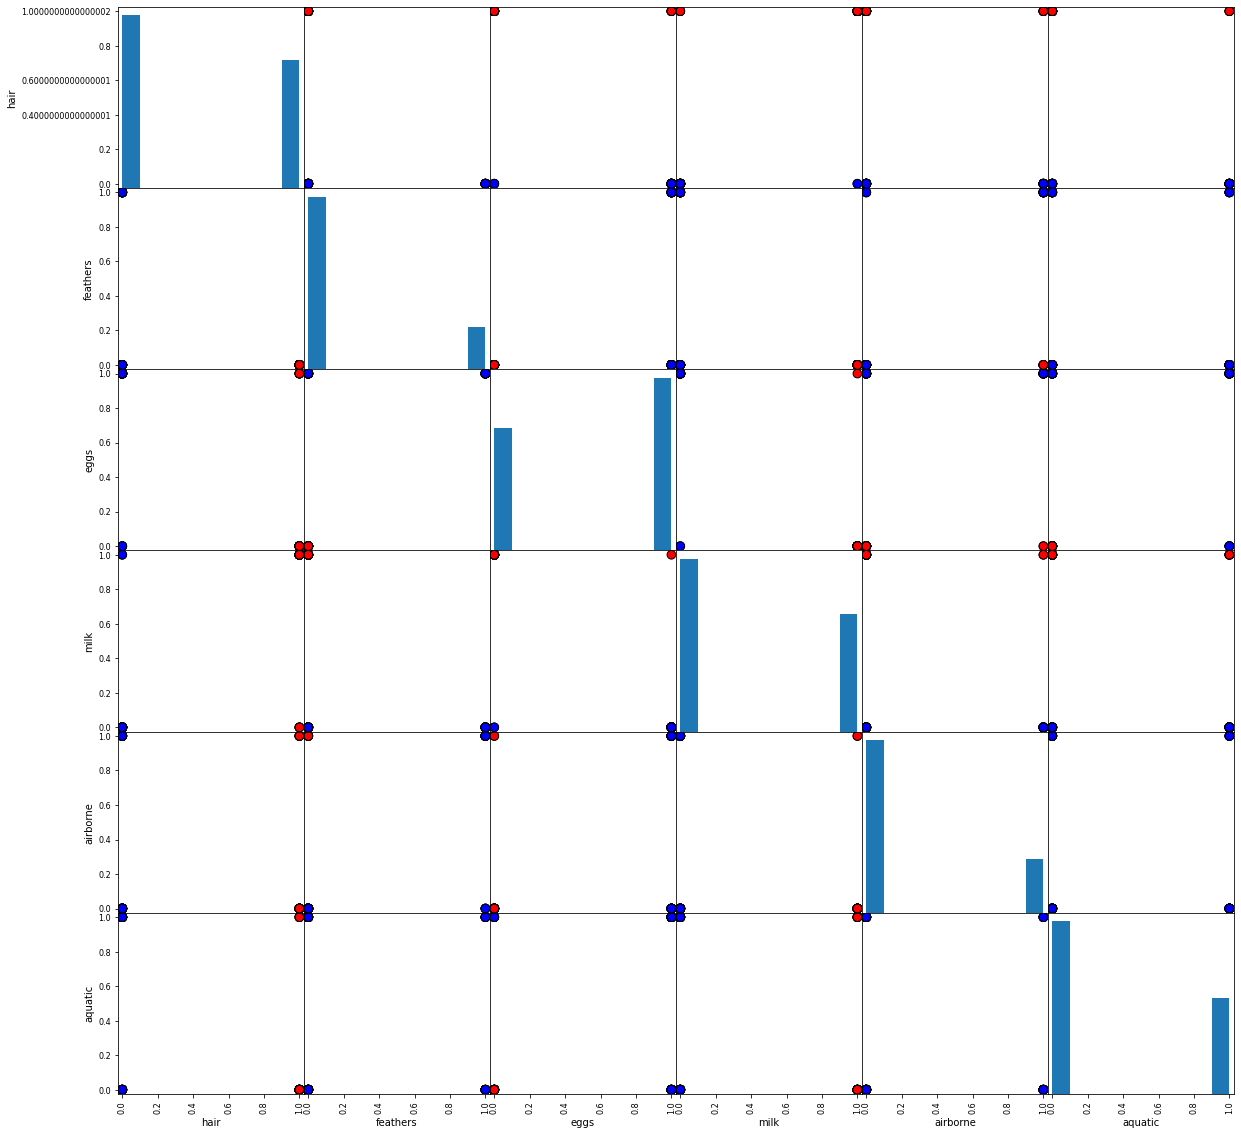

In [13]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

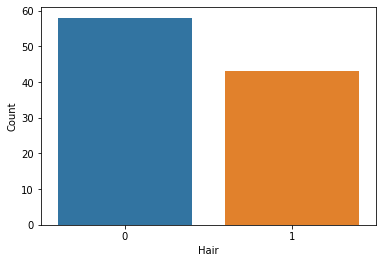

0    58
1    43
Name: hair, dtype: int64

In [14]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

[]

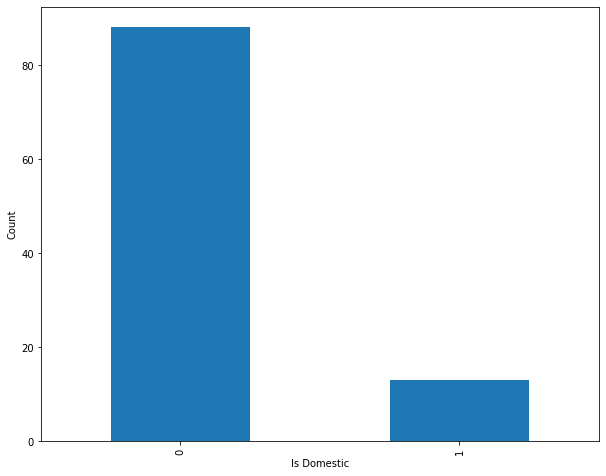

In [15]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [16]:
# So we can see mostly animals are not domestic.

In [17]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


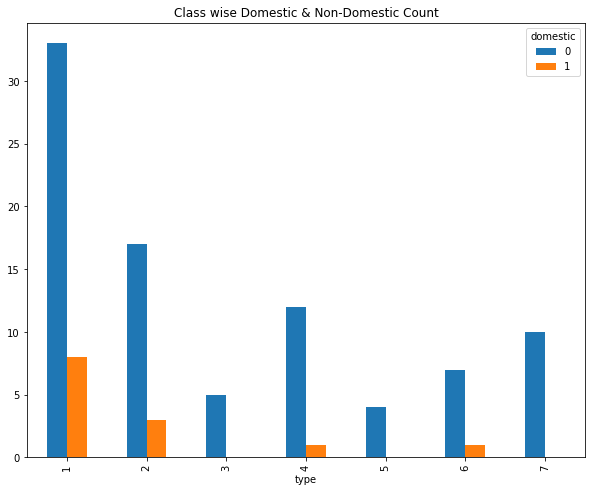

In [18]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [19]:
# Lets see how many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [20]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [21]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


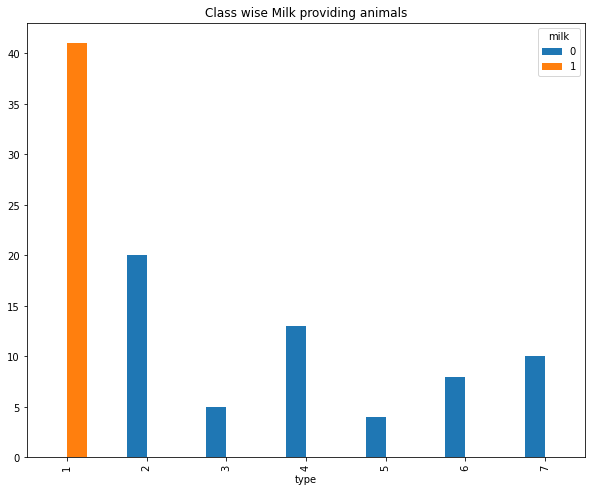

In [22]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [23]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
zoo.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [24]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
1     6
2     6
7     6
5     4
3     1
Name: type, dtype: int64

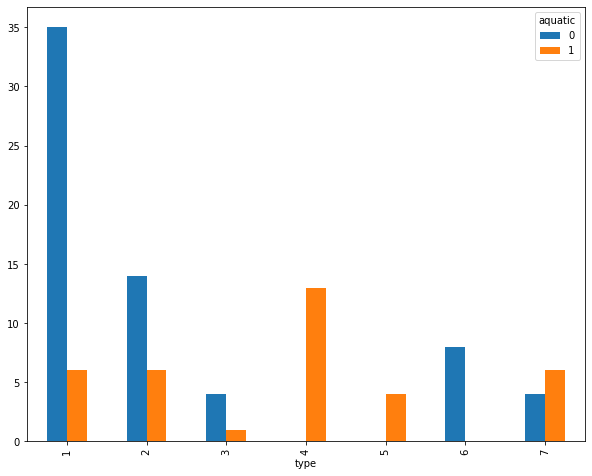

In [25]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [26]:
# finding Unique value of class_type
type_list = [i for i in zoo.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

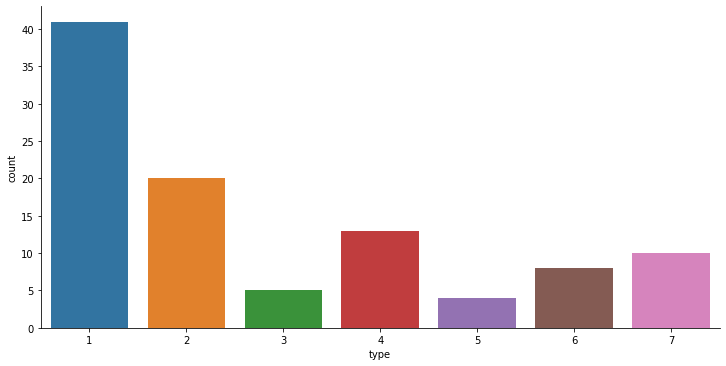

In [27]:
#use seaborn to plot the count of each 7 class_type
sns.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

In [28]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [29]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [30]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1


In [31]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0


In [32]:
Y_train

33    0
58    1
62    0
25    0
82    0
     ..
35    0
83    0
59    0
65    1
77    0
Name: catsize, Length: 70, dtype: int64

In [33]:
Y_test

55     1
0      1
16     0
12     0
24     0
56     1
17     1
18     1
13     0
100    0
47     1
72     0
71     1
36     0
32     1
5      1
2      0
86     1
14     0
97     0
30     0
41     0
27     0
80     0
60     1
44     1
7      0
21     0
95     1
63     1
15     0
Name: catsize, dtype: int64

In [34]:
num_folds = 10
kfold = KFold(n_splits=10)

In [35]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    22
1     9
dtype: int64

In [37]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
catsize,,
0,16,1
1,6,8


In [38]:
# Accuracy 
np.mean(preds==Y_test)

0.7741935483870968

In [39]:
model.score(X_train,Y_train)

0.8285714285714286

In [40]:
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 77.41935483870968


In [41]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

In [42]:
results = cross_val_score(model, X, Y, cv=kfold)

In [43]:
print(results.mean()*100)

75.09090909090908


In [44]:
print(results.std()*100)

15.09309951244482


# Grid Search for Algorithm Tuning

In [45]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [46]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [47]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 6}


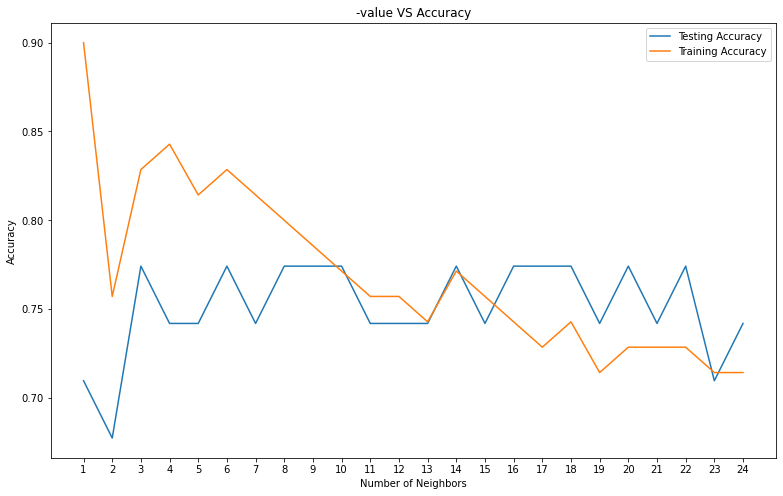

Best accuracy is 0.7741935483870968 with K = 3


In [48]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))